In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import random
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import statsmodels

campos_numericos_com = ['Qtde Ops', 'USD Total', 'MN Tot', 'MN Med', 'USD Med']

# Comercial Pessoa Física

In [27]:
df_com_f = pd.read_csv('Comercial_F.csv', sep=',')
scaler = StandardScaler()
df_com_f[campos_numericos_com] = scaler.fit_transform(df_com_f[campos_numericos_com])
df_com_f.dropna(subset=campos_numericos_com, inplace=True)

## Armazenando SSE e inertia

In [28]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

#iterações k-means

sse = []
n_iten = []
max_iter = 20
for k in range(1, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_f[campos_numericos_com])
    n_iten.append(kmeans.n_iter_)
    sse.append(kmeans.inertia_)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## Armazenando Silhouette Coef

In [29]:
# lista coef silhueta
silhouette_coefficients = []

# armazenando os coef silhueta
for k in range(2, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_f[campos_numericos_com])
    score = silhouette_score(df_com_f[campos_numericos_com], kmeans.labels_)
    silhouette_coefficients.append(score)


## Plotando as 3 comparações por cluster

Text(0.5, 0, 'N Cluster')

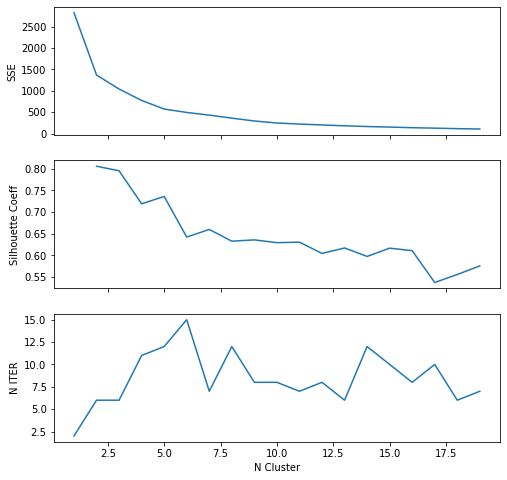

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
ax2.plot(range(2, max_iter), silhouette_coefficients)
ax2.set_ylabel("Silhouette Coeff")
ax3.plot(range(1, max_iter), n_iten)
ax3.set_ylabel("N ITER")
ax3.set_xlabel("N Cluster")

Text(0.5, 0, 'N Cluster')

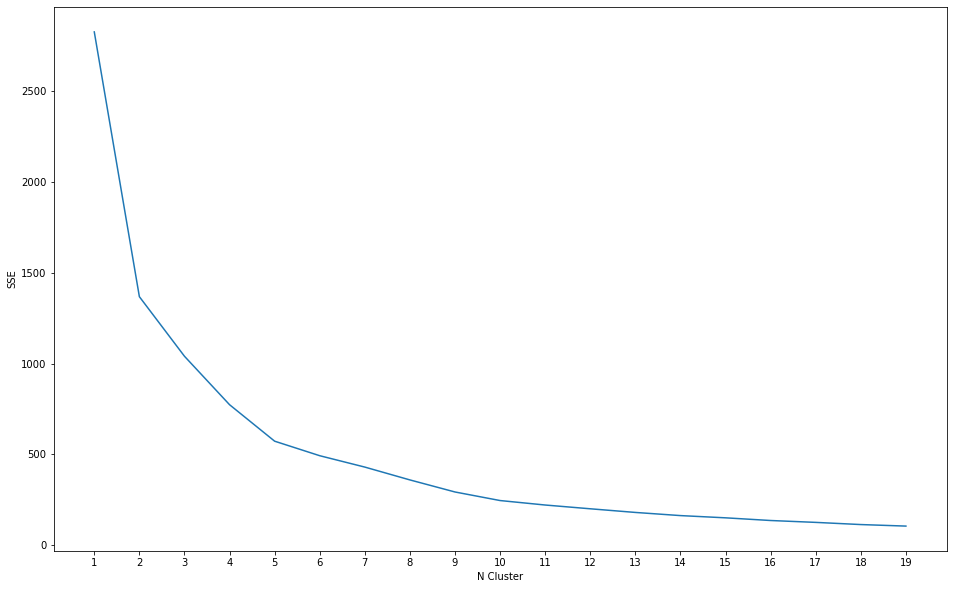

In [35]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(16,10))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
plt.xticks(range(1, max_iter))
ax1.set_xlabel("N Cluster")


Text(0.5, 0, 'N Cluster')

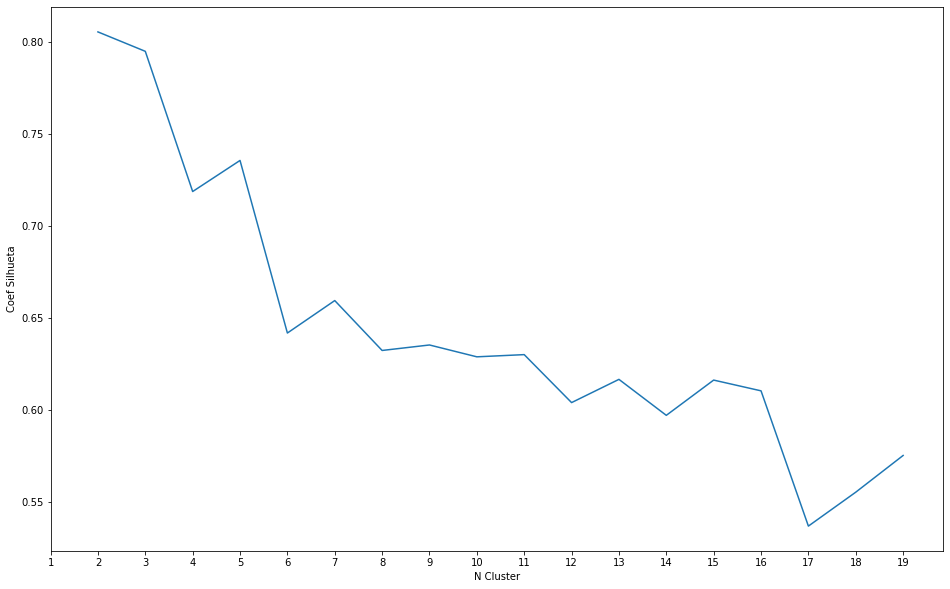

In [36]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(16,10))
ax1.plot(range(2, max_iter), silhouette_coefficients)
ax1.set_ylabel("Coef Silhueta")
plt.xticks(range(1, max_iter))
ax1.set_xlabel("N Cluster")

In [37]:
# Analisando cluster separadamente

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
n_iten = []

kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(df_com_f[campos_numericos_com])
n_iten.append(kmeans.n_iter_)
sse.append(kmeans.inertia_)

score = silhouette_score(df_com_f[campos_numericos_com], kmeans.labels_)
silhouette_coefficients.append(score)

In [38]:
# Printando as métricas

print(sse, score, n_iten)

[573.1630099367463] 0.7357551576851661 [12]


In [39]:
len(kmeans.labels_)

565

In [40]:
# Criando coluna com o numero do cluster para cada linha

df_com_f['Cluster'] = kmeans.labels_

In [41]:
df_com_f['Cluster'].value_counts()

1    478
2     43
4     24
3     15
0      5
Name: Cluster, dtype: int64

In [42]:
df_grupo_pf_com = df_com_f.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med'].mean()

<ipython-input-42-7db5072a6870>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grupo_pf_com = df_com_f.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med'].mean()


In [43]:
# Analisando o conteúdo de cada cluster

df_grupo_pf_com

,Qtde Ops,USD Total,MN Tot,Taxa Med,MN Med,USD Med
Cluster,,,,,,
0,-0.135142,2.419807,2.615401,5.444020,7.225023,6.765599
1,-0.235694,-0.301596,-0.295637,4.768837,-0.284482,-0.296751
2,0.034646,0.814748,0.740183,4.859749,1.579346,1.780015
3,2.724369,4.892188,4.957723,5.181202,1.994695,1.959877
4,2.957591,0.985287,0.918494,4.714911,0.084371,0.086671


# Comercial Pessoa Jurídica

In [44]:
df_com_j = pd.read_csv('Comercial_J.csv', sep=',')
df_com_j[campos_numericos_com] = scaler.fit_transform(df_com_j[campos_numericos_com])
df_com_j.dropna(subset=campos_numericos_com, inplace=True)

## Armazenando SSE e inertia

In [45]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

#iterações k-means
sse = []
n_iten = []
max_iter = 20
for k in range(1, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_j[campos_numericos_com])
    n_iten.append(kmeans.n_iter_)
    sse.append(kmeans.inertia_)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Armazenando Silhouette Coef

In [46]:
# lista coef silhueta
silhouette_coefficients = []

# armazenando os coef silhueta
for k in range(2, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_j[campos_numericos_com])
    score = silhouette_score(df_com_j[campos_numericos_com], kmeans.labels_)
    silhouette_coefficients.append(score)


## Plotando as 3 comparações por cluster

Text(0.5, 0, 'N Cluster')

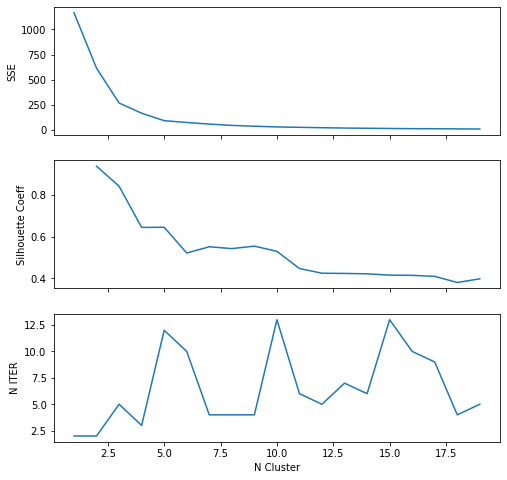

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
ax2.plot(range(2, max_iter), silhouette_coefficients)
ax2.set_ylabel("Silhouette Coeff")
ax3.plot(range(1, max_iter), n_iten)
ax3.set_ylabel("N ITER")
ax3.set_xlabel("N Cluster")

Text(0.5, 0, 'N Cluster')

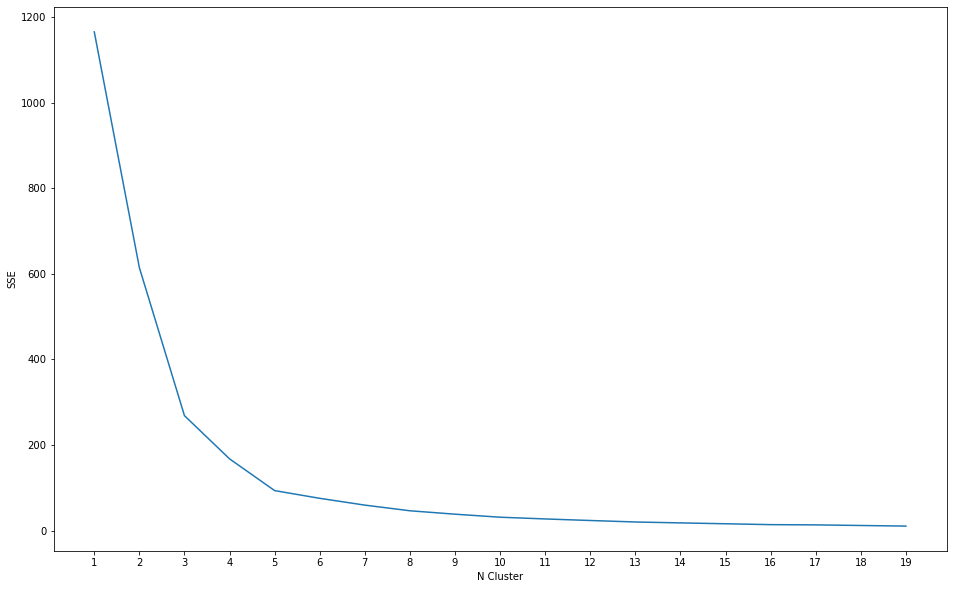

In [48]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(16,10))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
plt.xticks(range(1, max_iter))
ax1.set_xlabel("N Cluster")

Text(0.5, 0, 'N Cluster')

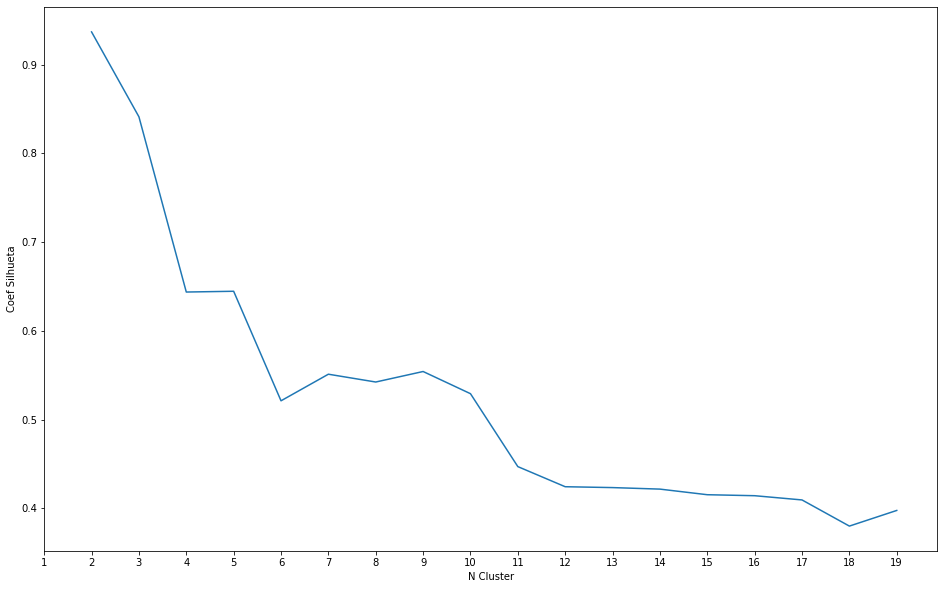

In [49]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(16,10))
ax1.plot(range(2, max_iter), silhouette_coefficients)
ax1.set_ylabel("Coef Silhueta")
plt.xticks(range(1, max_iter))
ax1.set_xlabel("N Cluster")

In [50]:
# Analisando cluster separadamente

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
n_iten = []

kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(df_com_j[campos_numericos_com])
n_iten.append(kmeans.n_iter_)
sse.append(kmeans.inertia_)

score = silhouette_score(df_com_j[campos_numericos_com], kmeans.labels_)
silhouette_coefficients.append(score)

In [51]:
print(sse, score, n_iten)

[93.31434676902226] 0.6445762537358741 [12]


In [52]:
len(kmeans.labels_)

233

In [53]:
df_com_j['Cluster'] = kmeans.labels_

In [54]:
df_com_j['Cluster'].value_counts()

4    183
2     39
3      7
0      3
1      1
Name: Cluster, dtype: int64

In [55]:
df_com_j['Cluster'].value_counts()

4    183
2     39
3      7
0      3
1      1
Name: Cluster, dtype: int64

In [58]:
df_grupo_pj_com = df_com_j.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med','MN Med', 'USD Med'].mean()

<ipython-input-58-6fc7f30844fb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grupo_pj_com = df_com_j.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med','MN Med', 'USD Med'].mean()


In [59]:
df_grupo_pj_com

,Qtde Ops,USD Total,MN Tot,Taxa Med,MN Med,USD Med
Cluster,,,,,,
0,0.228151,3.864917,4.247112,5.131744,1.465890,1.435519
1,15.181634,12.861093,12.322715,4.298791,-0.564316,-0.590268
2,-0.067133,0.183574,0.192839,4.840395,0.707101,0.787428
3,-0.100406,0.071920,0.122292,5.252120,4.721964,4.613841
4,-0.068552,-0.175512,-0.182737,4.773047,-0.352263,-0.364606
